In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
#tf.keras.layers.BatchNormalization()
from tensorflow.keras.layers import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16

In [2]:
print(os.listdir("C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/"))

['Test', 'Train']


In [3]:
SIZE = 256

In [4]:
train_images = []
train_labels = [] 

In [5]:
for directory_path in glob.glob("C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Train/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

without_mask
C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Train\without_mask\download (1).jpg
C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Train\without_mask\download (2).jpg
C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Train\without_mask\download (3).jpg
C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Train\without_mask\download.jpg
C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Train\without_mask\erge-mahindra-BCD0FN-bNNk-unsplash.jpg
C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Train\without_mask\erge-mahindra-g8kvlk_EmGo-unsplash.jpg
C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Train\without_mask\erge-mahindra-rFUpzPhqkE4-unsplash.jpg
C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Train\without_mask\eva-franco-mask-denim-baseball-hat-with-american-flag-scarf-set-14033496047705_1600x.jpg
C:/Us

In [6]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [7]:
train_images.shape

(2992, 256, 256, 3)

In [8]:
test_images = []
test_labels = [] 
for directory_path in glob.glob("C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Test/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

without_mask
C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Test\without_mask\Faceimg1,003.jpg
C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Test\without_mask\Faceimg1,004.jpg
C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Test\without_mask\Faceimg1,005.jpg
C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Test\without_mask\Faceimg1,006.jpg
C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Test\without_mask\Faceimg1,007.jpg
C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Test\without_mask\Faceimg1,008.jpg
C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Test\without_mask\Faceimg1,009.jpg
C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Test\without_mask\Faceimg1,010.jpg
C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/mask folder/Test\without_mask\Faceimg1,011.jpg
C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop

In [9]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [10]:
test_images.shape

(1015, 256, 256, 3)

In [11]:
train_labels

array(['without_mask', 'without_mask', 'without_mask', ..., 'with_mask',
       'with_mask', 'with_mask'], dtype='<U12')

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [13]:
train_labels_encoded

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [14]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [15]:
x_train=x_train/255.0

In [16]:
x_test=x_test/255.0

In [17]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [18]:
y_train_one_hot[2000]

array([1., 0.], dtype=float32)

In [19]:
y_train[2000]

0

In [20]:
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

In [21]:
for layer in VGG_model.layers:
	layer.trainable = False

In [22]:
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [23]:
feature_extractor=VGG_model.predict(x_train)

94/94 [==============================] - 728s 8s/step


In [24]:
len(feature_extractor[0])

8

In [25]:
feature_extractor[0]

array([[[0.11055338, 0.        , 0.        , ..., 0.        ,
         0.70209306, 0.        ],
        [0.02487166, 0.        , 0.        , ..., 0.        ,
         0.5668117 , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.56318927, 0.        ],
        ...,
        [0.02213287, 0.        , 0.        , ..., 0.        ,
         0.74911904, 0.        ],
        [0.06545173, 0.        , 0.        , ..., 0.        ,
         0.66115826, 0.        ],
        [0.14600655, 0.        , 0.        , ..., 0.        ,
         0.7676492 , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.55011255, 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.49954045, 0.        ],
        [0.09251218, 0.        , 0.46412122, ..., 0.        ,
         0.492185  , 0.        ],
        ...,
        [0.14822721, 0.        , 0.34321207, ..., 0.        ,
         0.7810458 , 0.        ],
        [0.1

In [26]:
feature_extractor.shape[0]

2992

In [27]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

In [28]:
X_for_SVM = features

In [29]:
#from sklearn.ensemble import svm
from sklearn import svm

In [30]:
SVM_model = svm.SVC()

In [31]:
SVM_model.fit(X_for_SVM, y_train)

SVC()

In [32]:
X_test_feature = VGG_model.predict(x_test)

32/32 [==============================] - 226s 7s/step


In [33]:
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [34]:
prediction_SVM = SVM_model.predict(X_test_features)

In [35]:
prediction_SVM = le.inverse_transform(prediction_SVM)

In [36]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_SVM))

Accuracy =  0.9753694581280788


In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
cm = confusion_matrix(test_labels, prediction_SVM)

<AxesSubplot:>

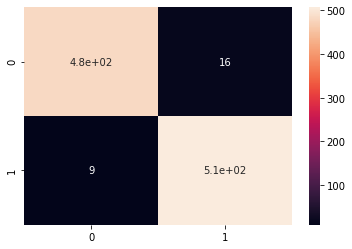

In [39]:
sns.heatmap(cm, annot=True)

1/1 [==============================] - 0s 140ms/step
The prediction for this image is:  ['with_mask']
The actual label for this image is:  with_mask


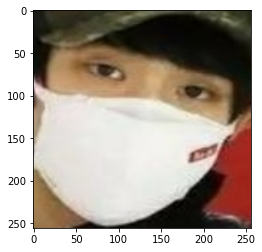

In [45]:
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_SVM = SVM_model.predict(input_img_features)[0] 
prediction_SVM = le.inverse_transform([prediction_SVM])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_SVM)
print("The actual label for this image is: ", test_labels[n])